In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import mode
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.regularizers import l2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cs = pd.read_csv ('Data from template 3.csv')
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cement (kg/m^{3} )            99 non-null     float64
 1   Fly ash (kg/m^{3} )           99 non-null     float64
 2   Water (kg/m^{3} )             99 non-null     float64
 3   Superplasticizer (kg/m^{3} )  99 non-null     float64
 4   Coarse aggregate (kg/m^{3} )  99 non-null     float64
 5   Fine aggregate (kg/m^{3} )    99 non-null     float64
 6   Age (Days)                    99 non-null     int64  
 7   Strength (MPa)                99 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 6.3 KB


In [3]:
df_cs

,Cement (kg/m^{3} ),Fly ash (kg/m^{3} ),Water (kg/m^{3} ),Superplasticizer (kg/m^{3} ),Coarse aggregate (kg/m^{3} ),Fine aggregate (kg/m^{3} ),Age (Days),Strength (MPa)
0,185.7,101.5,166.9,7.5,1006.4,905.4,90,38.28
1,170.7,127.4,161.8,7.8,1090.0,798.5,3,17.11
2,180.7,127.4,166.1,7.8,1090.0,798.6,14,23.34
3,160.7,127.4,162.1,7.8,1090.0,804.0,28,27.41
4,242.1,125.6,184.3,5.7,1057.6,779.3,14,21.91
...,...,...,...,...,...,...,...,...
94,318.9,124.8,212.7,5.7,860.5,725.0,28,36.09
95,355.9,124.5,196.3,11.0,801.4,769.0,28,36.27
96,199.8,124.8,185.4,12.6,849.3,856.5,28,18.01
97,278.7,124.8,170.3,10.1,925.3,782.0,28,41.16


In [4]:
df_cs.describe()

,Cement (kg/m^{3} ),Fly ash (kg/m^{3} ),Water (kg/m^{3} ),Superplasticizer (kg/m^{3} ),Coarse aggregate (kg/m^{3} ),Fine aggregate (kg/m^{3} ),Age (Days),Strength (MPa)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,241.739394,123.887879,178.605051,6.357576,1001.460606,794.427273,33.727273,30.658687
std,55.690326,10.177509,18.108152,4.925570,71.750947,45.987624,28.954157,12.984464
min,136.100000,92.100000,141.100000,0.000000,801.000000,687.000000,3.000000,9.490000
25%,197.550000,124.600000,162.950000,0.000000,959.050000,764.250000,14.000000,20.115000
50%,230.600000,124.800000,184.200000,7.000000,1006.400000,794.900000,28.000000,27.540000
75%,290.100000,124.800000,191.600000,10.500000,1055.600000,810.700000,28.000000,40.090000
max,376.000000,168.300000,220.500000,18.000000,1118.000000,905.400000,90.000000,72.110000


In [5]:
def des_stat(df): 

    # Compute descriptive statistics
    descriptive_stats = {
        'Mean': df.mean(),
        'Standard Error': df.sem(),
        'Median': df.median(),
        'Mode': df.mode().iloc[0],  # Use iloc[0] to get the mode(s) as a Series
        'Standard Deviation': df.std(),
        'Sample Variance': df.var(),
        'Skewness': df.skew(),
        'Range': df.max() - df.min(),
        'Minimum': df.min(),
        'Maximum': df.max(),
        'Sum': df.sum(),
        'Count': df.count()
    }

    # Create a DataFrame from the computed statistics
    descriptive_df = pd.DataFrame(descriptive_stats)

    # Display the descriptive DataFrame
    return descriptive_df.transpose()


In [6]:
des_stat(df_cs)

,Cement (kg/m^{3} ),Fly ash (kg/m^{3} ),Water (kg/m^{3} ),Superplasticizer (kg/m^{3} ),Coarse aggregate (kg/m^{3} ),Fine aggregate (kg/m^{3} ),Age (Days),Strength (MPa)
Mean,241.739394,123.887879,178.605051,6.357576,1001.460606,794.427273,33.727273,30.658687
Standard Error,5.597088,1.022878,1.819938,0.495038,7.211241,4.621930,2.910002,1.304988
Median,230.600000,124.800000,184.200000,7.000000,1006.400000,794.900000,28.000000,27.540000
Mode,213.500000,124.800000,169.600000,0.000000,968.000000,800.000000,28.000000,17.110000
Standard Deviation,55.690326,10.177509,18.108152,4.925570,71.750947,45.987624,28.954157,12.984464
Sample Variance,3101.412412,103.581688,327.905178,24.261243,5148.198330,2114.861596,838.343228,168.596312
Skewness,0.247181,0.533738,-0.052308,0.002947,-0.774999,0.429418,1.050912,0.658000
Range,239.900000,76.200000,79.400000,18.000000,317.000000,218.400000,87.000000,62.620000
Minimum,136.100000,92.100000,141.100000,0.000000,801.000000,687.000000,3.000000,9.490000
Maximum,376.000000,168.300000,220.500000,18.000000,1118.000000,905.400000,90.000000,72.110000


In [7]:
def plot_relative_freq_dist(df, bins):

    # Get the list of all column names (features) in the DataFrame
    features = df.select_dtypes(include=['int', 'float']).columns  # Select only numeric features

    # Calculate number of subplots needed (3x3 grid)
    num_features = len(features)
    num_rows = 3
    num_cols = 3
    num_subplots = num_features

    # Create a new figure and subplots with specified size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Iterate over each feature and create a histplot for numeric features
    for i, feature in enumerate(features):
        if i < num_subplots:  # Only plot up to the available subplots
            # Create histplot on specified subplot with skyblue color
            sns.histplot(df[feature], bins=bins, kde=True, ax=axes[i], color='pink')
            axes[i].set_xlabel(feature)  # Set x-axis label
            axes[i].set_ylabel('Relative frequency distribution')  # Set y-axis label
            
    fig.suptitle(f'Histogram showing the maximum concentration used in evaluating the compressive strength')
    # Adjust layout and spacing between subplots
    plt.tight_layout()


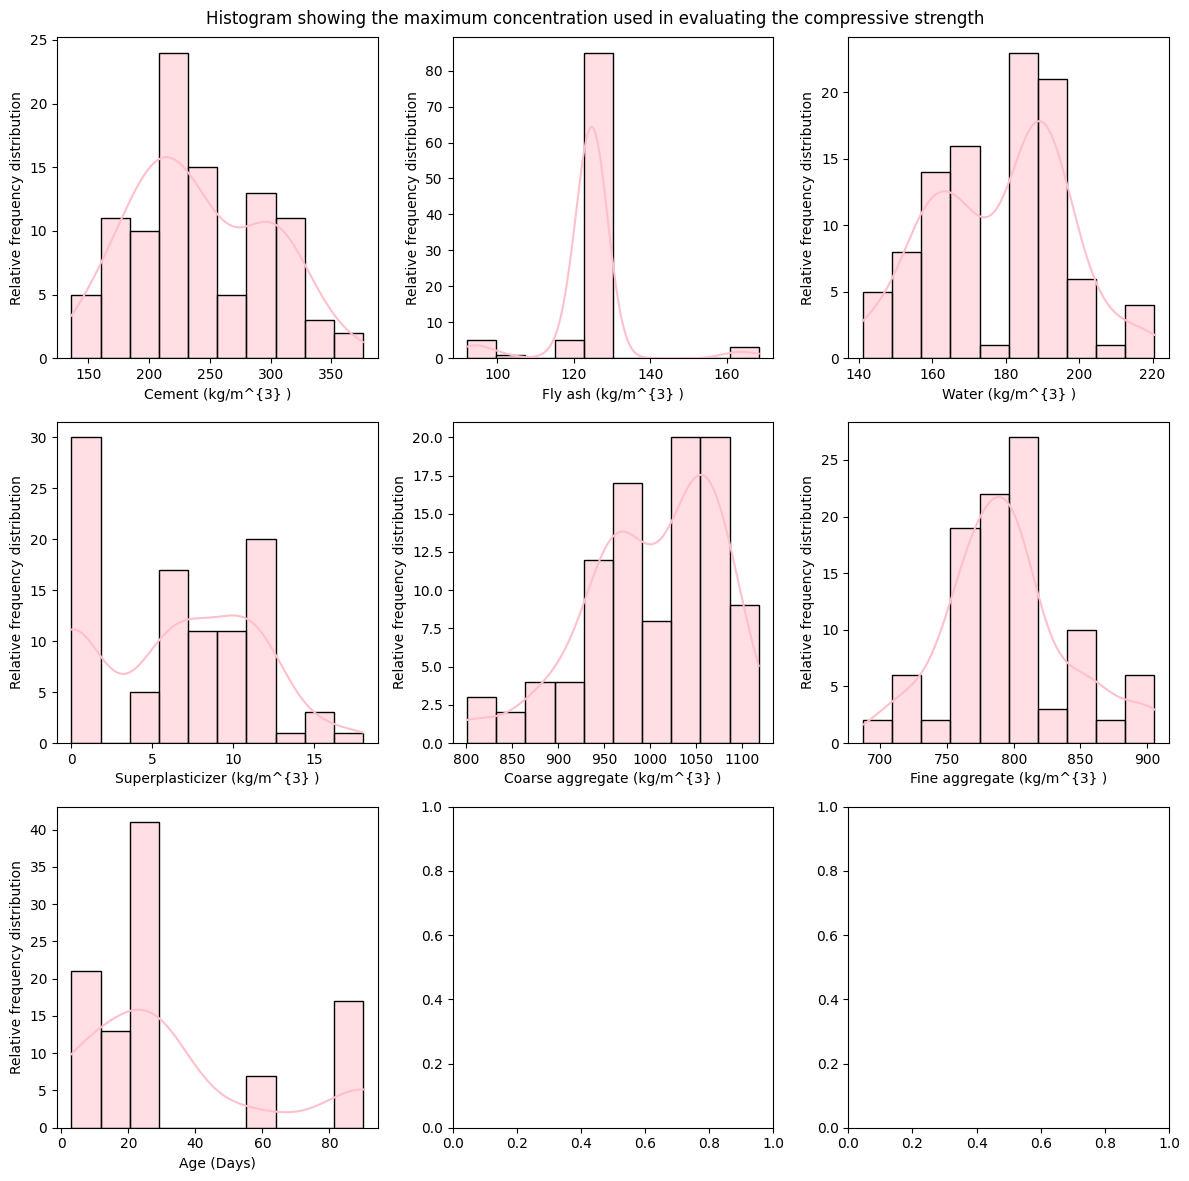

In [8]:
plot_relative_freq_dist(df_cs.iloc[:,:-1], 10)
plt.show()

In [9]:
X = df_cs.iloc[:,:-1]
y = df_cs.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Decision Tree (DT)

In [39]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth=7, min_samples_split=3, min_samples_leaf=1, random_state=0)

cv_scores = cross_val_score(model_dt, X_train, y_train, cv=10, scoring='r2')

print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean R2 Score: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 Score on Test Set: {test_r2:.4f}")

Cross-Validation Scores:
[ 0.99965932  0.00355418  0.99391448  0.99305624  0.78454603  0.
 -0.13143333  0.93224931  0.9875088   0.99767315]
Mean R2 Score: 0.6561 (±0.4628)
R2 Score on Test Set: 0.3949


In [18]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [5, 6, 7],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 3, 4]
}

grid_search = GridSearchCV(model_dt, param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")


Best Hyperparameters from GridSearchCV: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [19]:
best_params_DTC = grid_search.best_params_

best_model_dt = DecisionTreeRegressor(**best_params_DTC, random_state=42)
best_model_dt.fit(X_train, y_train)


yhat_dt = best_model_dt.predict(X_test)
MSE_dt = mean_squared_error(y_test, yhat_dt)
print(f"MSE from DT: {MSE_dt:.2f}")
MAE_dt = mean_absolute_error(y_test, yhat_dt)
print(f"MAE from DT: {MAE_dt:.2f}")
r2_dt = r2_score(y_test, yhat_dt)
print(f"R2 score: {r2_dt: .2f}")
rmse_dt = np.sqrt(MSE_dt)
print(f"Root Mean Squared Error (RMSE) from DT:{rmse_dt}")

MSE from DT: 142.87
MAE from DT: 4.14
R2 score:  0.41
Root Mean Squared Error (RMSE) from DT:11.952764864156519


In [24]:
df_cs.columns

Index(['Cement (kg/m^{3} )', 'Fly ash (kg/m^{3} )', 'Water (kg/m^{3} )',
       'Superplasticizer (kg/m^{3} )', 'Coarse aggregate (kg/m^{3} )',
       'Fine aggregate (kg/m^{3} )', 'Age (Days)', 'Strength (MPa)'],
      dtype='object')

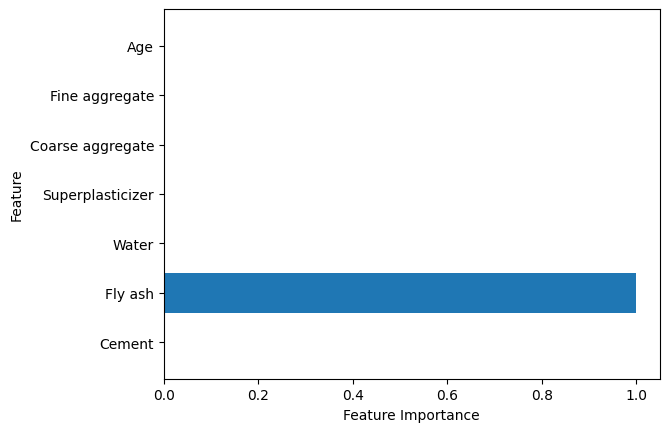

In [28]:
def plot_feature_importances_custom(model, feature_names):
    n_features = len(feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

custom_feature_names = ["Cement", "Fly ash", "Water","Superplasticizer", "Coarse aggregate", "Fine aggregate", "Age"]
plot_feature_importances_custom(model_dt, custom_feature_names)